# Class

## Binary classification

In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:
from sklearn.datasets import make_circles

n=1000
X, y=make_circles(n, noise=.03, random_state=42)

In [ ]:
import pandas as pd

df=pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y':y})
df.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


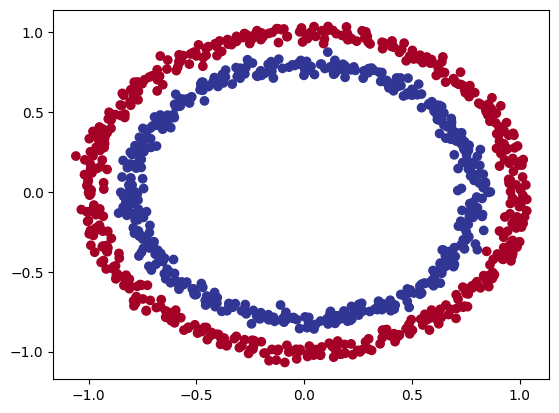

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y,  cmap=plt.cm.RdYlBu);

In [ ]:
tf.random.set_seed(42)

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 8s 4ms/step - loss: 4.3978 - accuracy: 0.4710
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3689 - accuracy: 0.4710
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 4.3359 - accuracy: 0.4700
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.3029 - accuracy: 0.4700
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 4.2633 - accuracy: 0.4700


In [ ]:
model.fit(X, y, epochs=200, verbose=0)
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7644 - accuracy: 0.4850


[0.7643840312957764, 0.48500001430511475]

In [ ]:
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_2.fit(X, y, epochs=100, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5340


[0.6931900978088379, 0.5339999794960022]

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    x_in = np.c_[xx.ravel(), yy.ravel()]
    y_pred = model.predict(x_in)

    if model.output_shape[-1] > 1:
        print("doing multiclass classification...")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classifcation...")
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


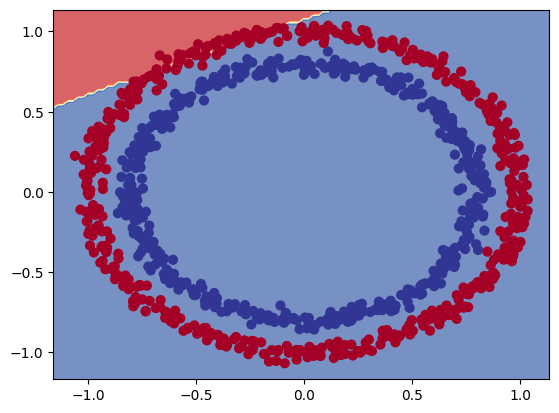

In [ ]:
plot_decision_boundary(model_2, X, y)

In [ ]:
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_3.fit(X, y, epochs=100, verbose=0)
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


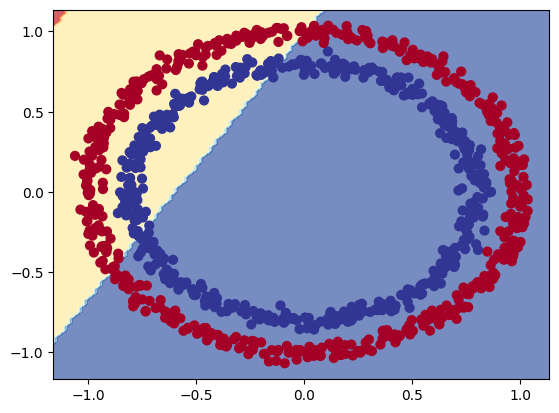

In [ ]:
plot_decision_boundary(model_3, X, y)

In [ ]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1)
])

model_4.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model_4.fit(X, y, epochs=100, verbose=0)
model_4.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6786 - accuracy: 0.6310


[0.6786481738090515, 0.6309999823570251]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


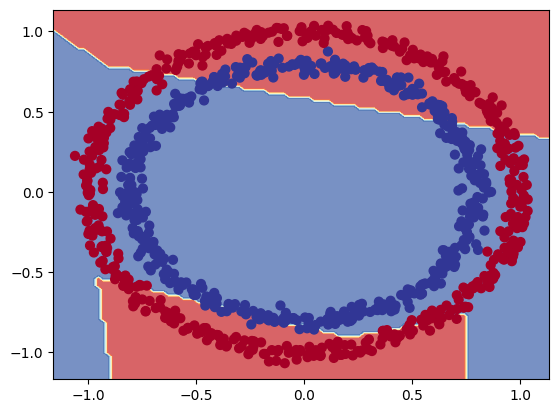

In [ ]:
plot_decision_boundary(model_4, X, y)

In [ ]:
tf.random.set_seed(42)

model_5=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

model_5.fit(X, y, epochs=100, verbose=0)
model_5.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9890


[0.22633834183216095, 0.9890000224113464]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


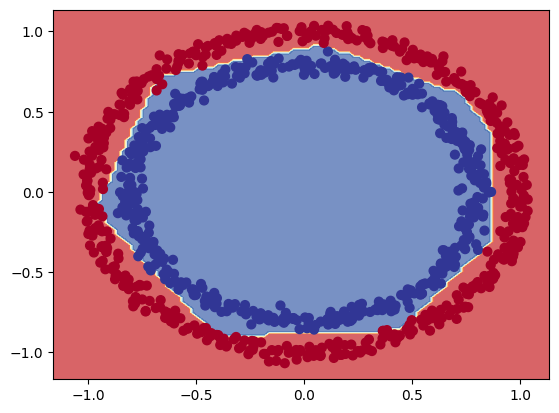

In [ ]:
plot_decision_boundary(model_5, X, y)

In [ ]:
X_train, y_train=X[:800], y[:800]
X_test, y_test=X[800:], y[800:]

In [ ]:
tf.random.set_seed(42)

model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
               metrics=['accuracy'])

hist_6=model_6.fit(X_train, y_train, epochs=25, verbose=0)
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0883 - accuracy: 0.9950


[0.08828647434711456, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


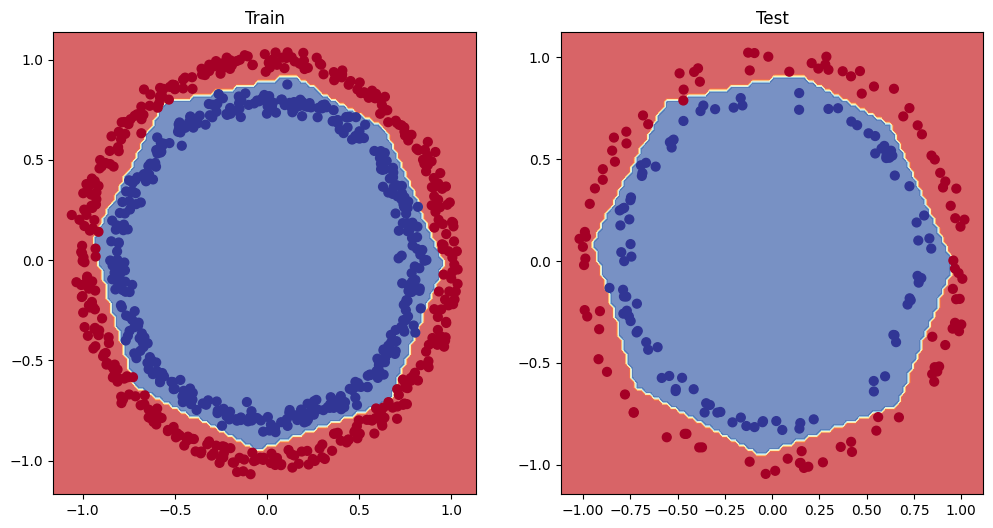

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_6, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_6, X=X_test, y=y_test)
plt.show()

Text(0.5, 1.0, 'Model_6 training curves')

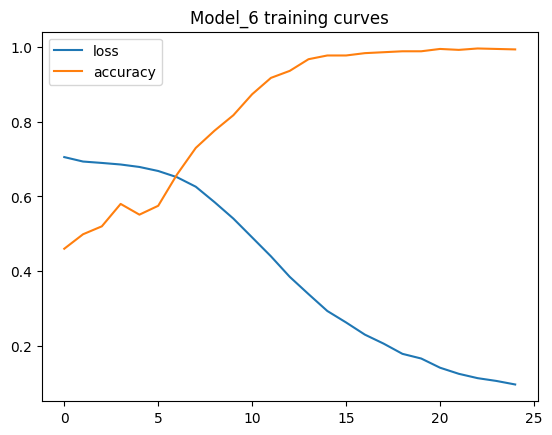

In [ ]:
pd.DataFrame(hist_6.history).plot()
plt.title("Model_6 training curves")

In [ ]:
class CustomLogPrint(tf.keras.callbacks.Callback):
    def __init__(self, interval):
            super(CustomLogPrint, self).__init__()
            self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: {logs}")

In [ ]:
tf.random.set_seed(42)

model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

lr_cb=tf.keras.callbacks.LearningRateScheduler(lambda e: 1e-4*10**(e/20))

hist_7=model_7.fit(X_train, y_train,
                   epochs=100,
                   verbose=0,
                   callbacks=[lr_cb, CustomLogPrint(10)])

Epoch 1: {'loss': 0.6917664408683777, 'accuracy': 0.5137500166893005, 'lr': 1e-04}
Epoch 10: {'loss': 0.6909422874450684, 'accuracy': 0.5137500166893005, 'lr': 0.0002818383}
Epoch 20: {'loss': 0.6890094876289368, 'accuracy': 0.5199999809265137, 'lr': 0.00089125097}
Epoch 30: {'loss': 0.6836201548576355, 'accuracy': 0.5237500071525574, 'lr': 0.002818383}
Epoch 40: {'loss': 0.5291987061500549, 'accuracy': 0.7887499928474426, 'lr': 0.008912509}
Epoch 50: {'loss': 0.0860554501414299, 'accuracy': 0.9825000166893005, 'lr': 0.028183829}
Epoch 60: {'loss': 0.10021676868200302, 'accuracy': 0.9637500047683716, 'lr': 0.0891251}
Epoch 70: {'loss': 0.05051195248961449, 'accuracy': 0.9825000166893005, 'lr': 0.2818383}
Epoch 80: {'loss': 0.6418980360031128, 'accuracy': 0.5774999856948853, 'lr': 0.8912509}
Epoch 90: {'loss': 0.7835665345191956, 'accuracy': 0.5237500071525574, 'lr': 2.818383}
Epoch 100: {'loss': 0.8583130836486816, 'accuracy': 0.4612500071525574, 'lr': 8.912509}


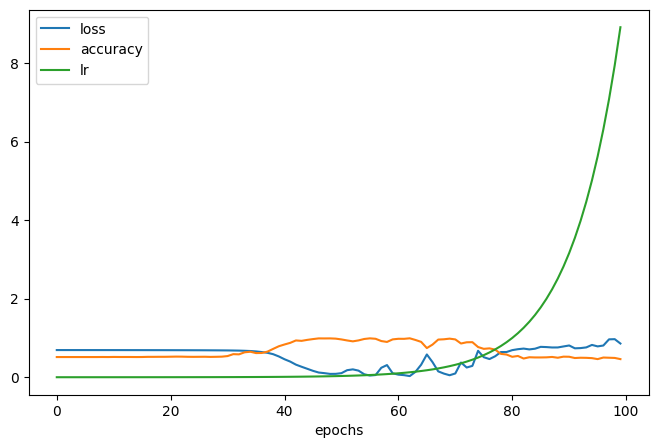

In [ ]:
pd.DataFrame(hist_7.history).plot(figsize=(8, 5), xlabel='epochs');

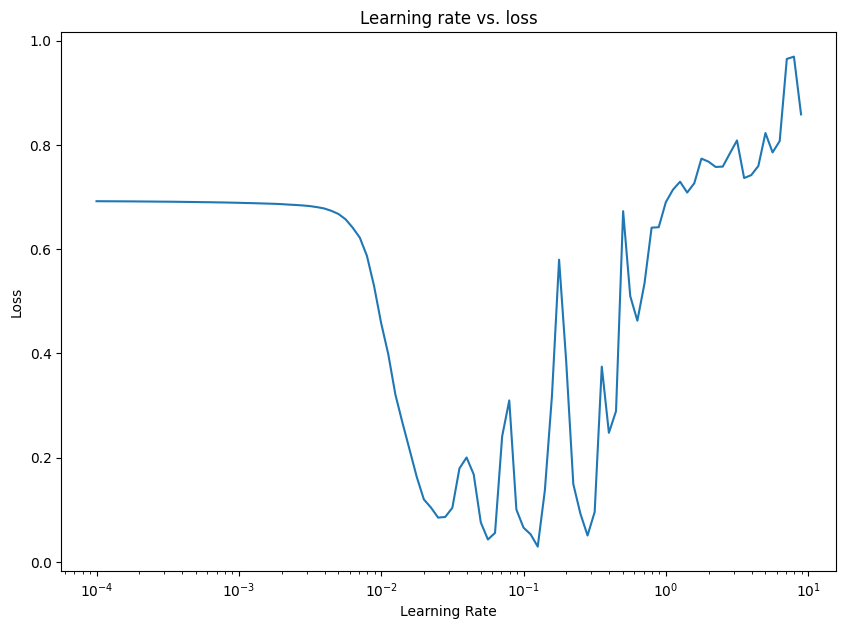

In [ ]:
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, hist_7.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

In [ ]:
tf.random.set_seed(42)

model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(1, 'sigmoid')
])

model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=3e-2),
                metrics=['accuracy'])

hist_8=model_8.fit(X_train, y_train,
                   epochs=20,
                   verbose=0,
                   callbacks=[CustomLogPrint(5)])

Epoch 1: {'loss': 0.6893447637557983, 'accuracy': 0.5387499928474426}
Epoch 5: {'loss': 0.4706287086009979, 'accuracy': 0.8075000047683716}
Epoch 10: {'loss': 0.07331012189388275, 'accuracy': 0.9925000071525574}
Epoch 15: {'loss': 0.05236266553401947, 'accuracy': 0.9800000190734863}
Epoch 20: {'loss': 0.04382295906543732, 'accuracy': 0.9862499833106995}


In [ ]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0402 - accuracy: 0.9900


[0.04024829715490341, 0.9900000095367432]

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


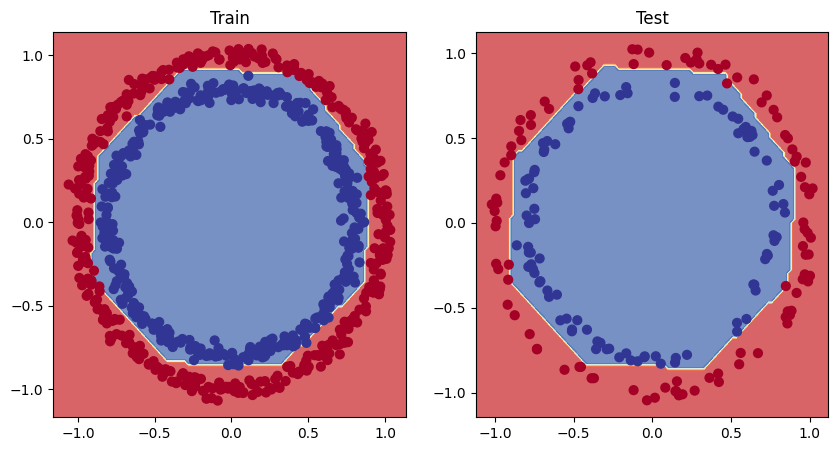

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9900
Model loss on test set: 0.04024829715490341
Model accuracy on test set: 99.00%


In [ ]:
from sklearn.metrics import confusion_matrix

y_preds=model_8.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[99,  2],
       [ 0, 99]])

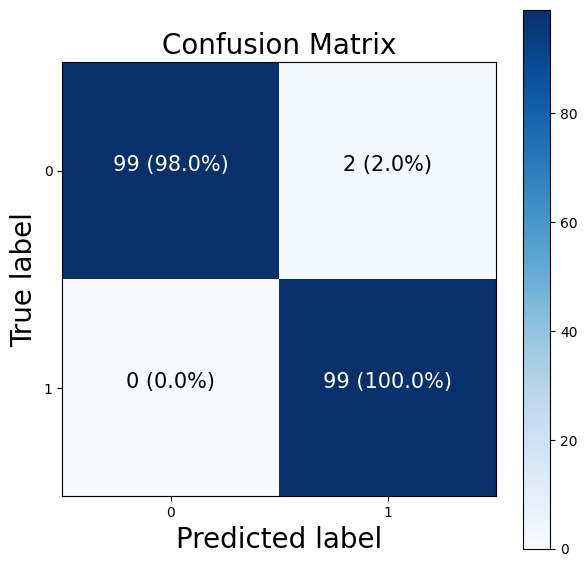

In [ ]:
import itertools

figsize = (7, 7)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min()) / 2.

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

## Multiclass classification

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
np.set_printoptions(linewidth=np.inf)

print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 2

In [ ]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

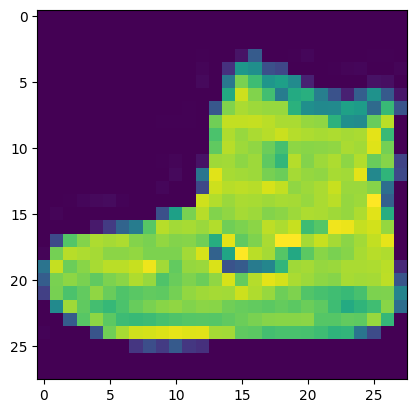

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0]);

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

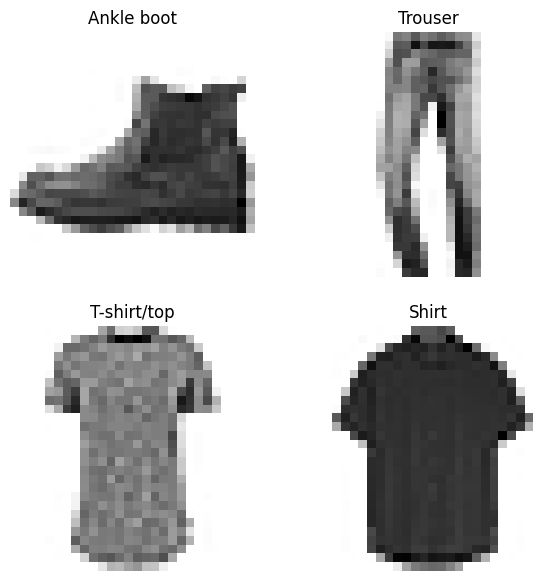

In [ ]:
import random

plt.figure(figsize=(7,7))

for i in range(4):
    plt.subplot(2,2,i+1)
    rand_idx=random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_idx], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_idx]])
    plt.axis(False)

In [ ]:
tf.random.set_seed(42)

model_9=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(10, 'softmax'),
])

model_9.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

hist_9=model_9.fit(train_data, train_labels,
                 epochs=10,
                 validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 2.3616 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3026 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0974 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
train_data, test_data=train_data/255., test_data/255.

In [ ]:
tf.random.set_seed(42)

model_10=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(4, 'relu'),
    tf.keras.layers.Dense(10, 'softmax'),
])

model_10.compile(loss='sparse_categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

hist_10=model_10.fit(train_data, train_labels,
                 epochs=10,
                 validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 1.2569 - accuracy: 0.5150 - val_loss: 0.9557 - val_accuracy: 0.6413
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8125 - accuracy: 0.7042 - val_loss: 0.7688 - val_accuracy: 0.7274
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7130 - accuracy: 0.7425 - val_loss: 0.7159 - val_accuracy: 0.7479
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6662 - accuracy: 0.7635 - val_loss: 0.6912 - val_accuracy: 0.7605
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6391 - accuracy: 0.7753 - val_loss: 0.6608 - val_accuracy: 0.7714
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6205 - accuracy: 0.7821 - val_loss: 0.6617 - val_accuracy: 0.7656
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6106 - accuracy: 0.7849 - val_loss: 0.6513 - val_accurac

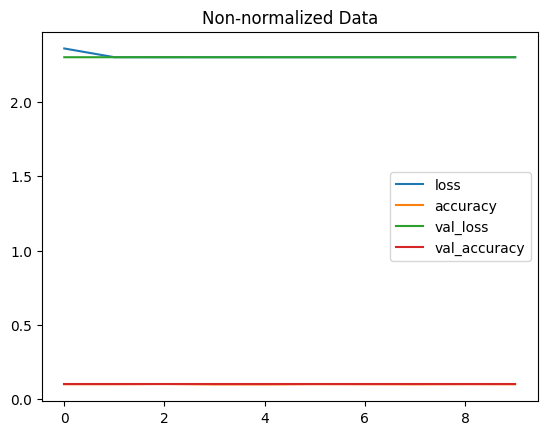

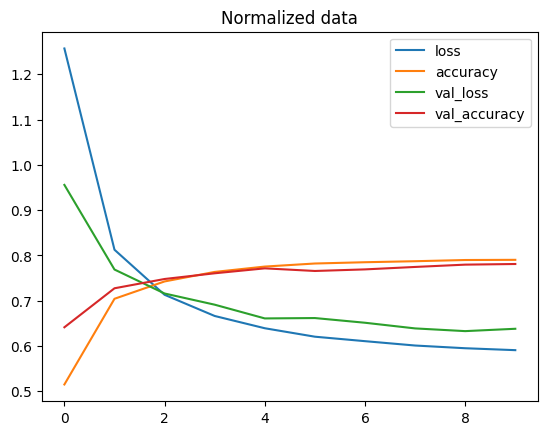

In [ ]:
import pandas as pd

pd.DataFrame(hist_9.history).plot(title="Non-normalized Data")
pd.DataFrame(hist_10.history).plot(title="Normalized data");

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  threshold = (cm.max() + cm.min()) / 2.

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
y_probs=model_10.predict(test_data)
y_preds=y_probs.argmax(axis=1)

313/313 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[798,  26,  23,  62,   7,   1,  75,   0,   8,   0],
       [ 10, 950,   1,  30,   1,   1,   7,   0,   0,   0],
       [ 35,   1, 677,  14, 100,   2, 168,   0,   3,   0],
       [ 41,  49,  10, 827,  19,   2,  46,   0,   6,   0],
       [  3,   0, 194,  63, 623,   0, 102,   0,  15,   0],
       [  0,   4,   0,   3,   0, 881,   0,  63,  13,  36],
       [238,   9, 208,  45, 177,   1, 316,   0,   6,   0],
       [  0,   0,   0,   0,   0,  24,   0, 949,   0,  27],
       [  2,   1,   5,  18,  62,  10,  18,   9, 875,   0],
       [  0,   0,   0,   1,   1,  24,   0,  60,   0, 914]])

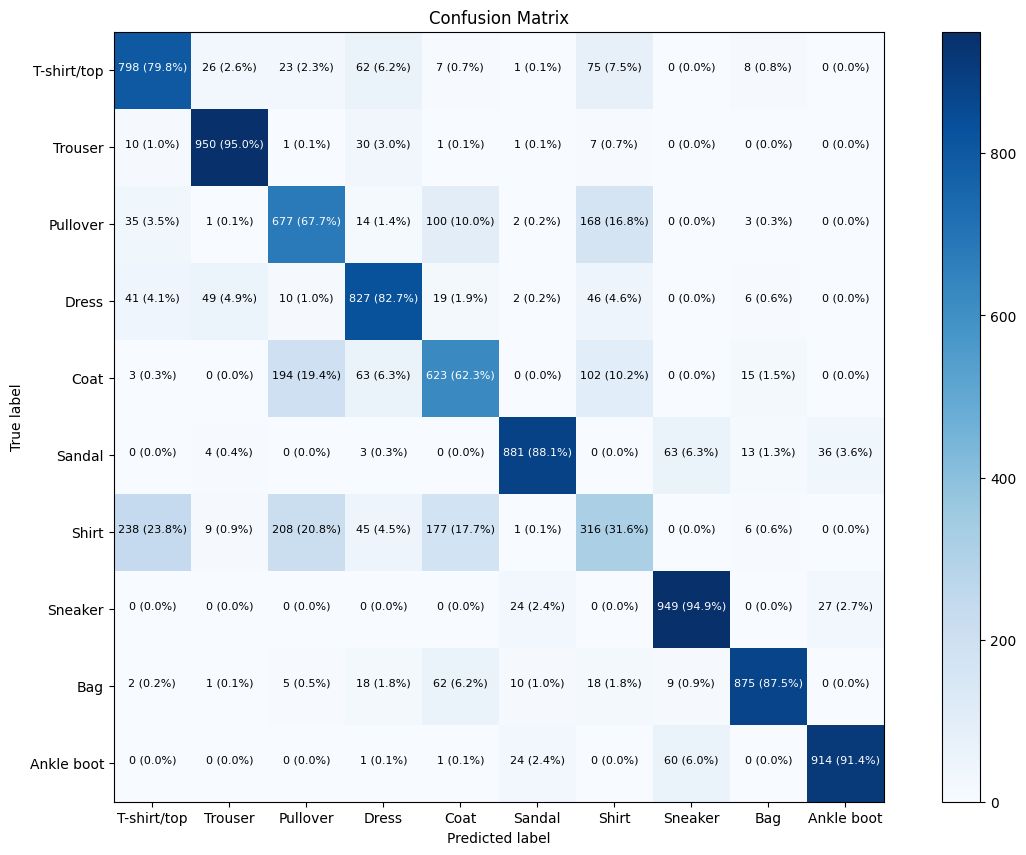

In [ ]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 10),
                      text_size=8)

In [ ]:
model_10.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_35 (Dense)            (None, 4)                 3140      
                                                                 
 dense_36 (Dense)            (None, 4)                 20        
                                                                 
 dense_37 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights, biases = model_10.layers[1].get_weights()

weights.shape

(784, 4)

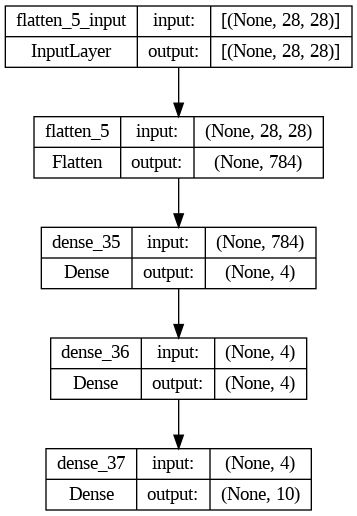

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_10, show_shapes=True)

# HW

# Fraud classification

In [8]:
! pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

{}

In [10]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle competitions download -c talkingdata-adtracking-fraud-detection

100% 1.94G/1.94G [01:45<00:00, 21.4MB/s]
100% 1.94G/1.94G [01:45<00:00, 19.8MB/s]


In [13]:
!unzip talkingdata-adtracking-fraud-detection.zip

Archive:  talkingdata-adtracking-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: test_supplement.csv     
  inflating: train.csv               
  inflating: train_sample.csv        


### EDA & FE

In [15]:
import pandas as pd

train=pd.read_csv('train_sample.csv')
train.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [16]:
train.isna().sum()

ip                     0
app                    0
device                 0
os                     0
channel                0
click_time             0
attributed_time    99773
is_attributed          0
dtype: int64

In [18]:
train.nunique()

ip                 34857
app                  161
device               100
os                   130
channel              161
click_time         80350
attributed_time      227
is_attributed          2
dtype: int64

In [29]:
train['is_attributed'].value_counts(normalize=True)

0    0.99773
1    0.00227
Name: is_attributed, dtype: float64

In [39]:
train['click_time'] = pd.to_datetime(train['click_time'])

train['year'] = train['click_time'].dt.year.astype('int')
train['month'] = train['click_time'].dt.month.astype('int')
train['day'] = train['click_time'].dt.day.astype('int')
train['hour'] = train['click_time'].dt.hour.astype('int')
train['minute'] = train['click_time'].dt.minute.astype('int')
train['second'] = train['click_time'].dt.second.astype('int')
train['day_of_week'] = train['click_time'].dt.day_name()

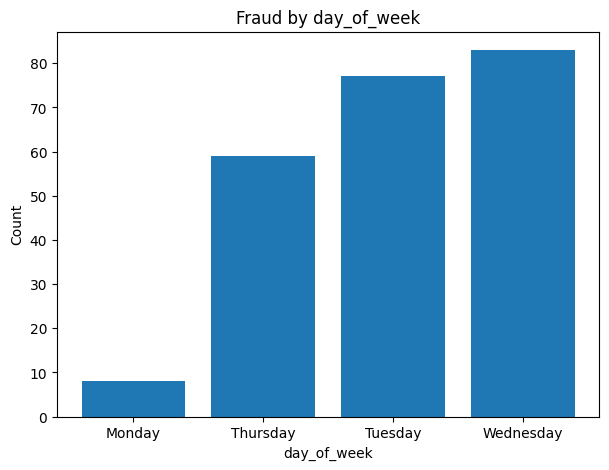

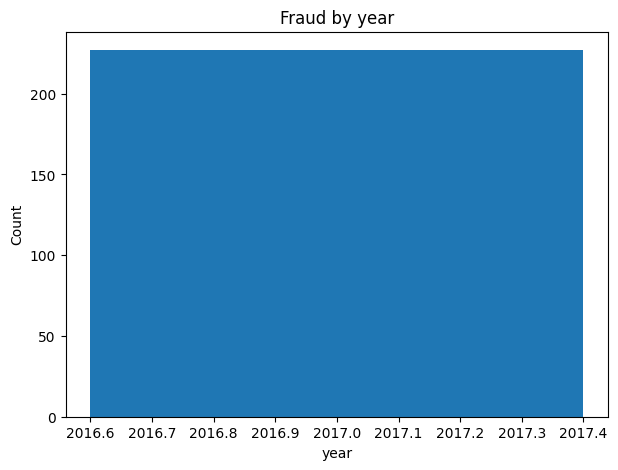

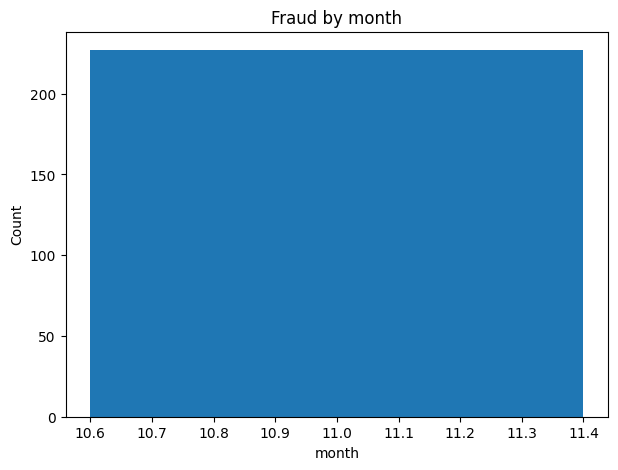

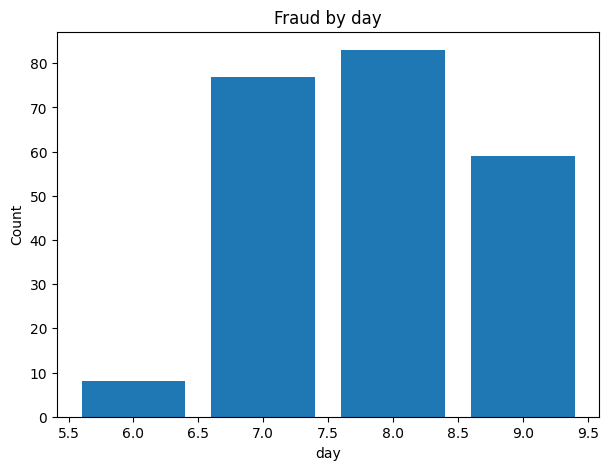

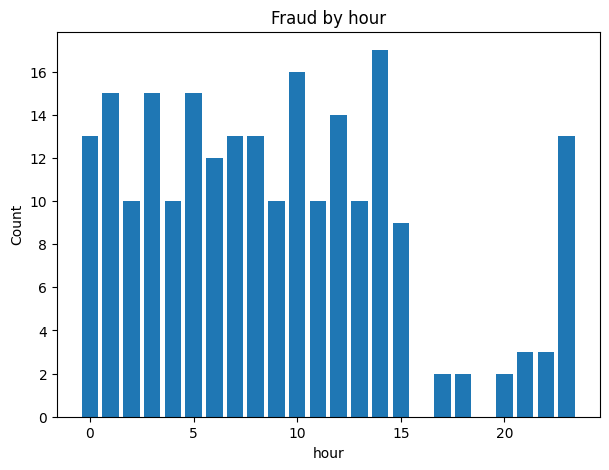

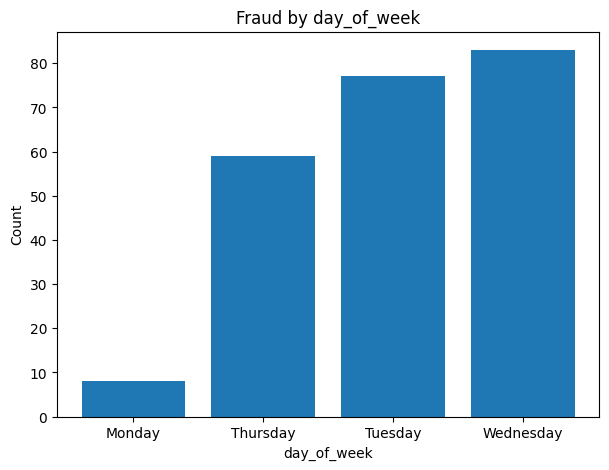

In [48]:
import matplotlib.pyplot as plt

frauds=train[train['is_attributed']==1].index

for i in ['day_of_week', 'year', 'month', 'day', 'hour', 'day_of_week']:
    plt.figure(figsize=(7,5))
    val_c=train.loc[frauds, i].value_counts().sort_index()
    plt.bar(val_c.index, val_c)
    plt.title(f'Fraud by {i}')
    plt.ylabel('Count')
    plt.xlabel(f'{i}');

In [50]:
train=train.drop(['ip', 'attributed_time', 'click_time'], axis = 1)

### Data Prer

In [54]:
train.head()

,app,device,os,channel,is_attributed,year,month,day,hour,minute,second,day_of_week,is_weekend
0,12,1,13,497,0,2017,11,7,9,30,38,Tuesday,0
1,25,1,17,259,0,2017,11,7,13,40,27,Tuesday,0
2,12,1,19,212,0,2017,11,7,18,5,24,Tuesday,0
3,13,1,13,477,0,2017,11,7,4,58,8,Tuesday,0
4,12,1,1,178,0,2017,11,9,9,0,9,Thursday,0


In [55]:
train.columns

Index(['app', 'device', 'os', 'channel', 'is_attributed', 'year', 'month',
       'day', 'hour', 'minute', 'second', 'day_of_week', 'is_weekend'],
      dtype='object')

In [80]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer([
    ('num', MinMaxScaler(), ['year', 'month', 'day', 'hour', 'minute', 'second']),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['app', 'device', 'os', 'channel', 'day_of_week']),
    ('other', 'passthrough', ['is_weekend'])
])

In [94]:
from sklearn.model_selection import train_test_split

X, y=train.drop('is_attributed', axis=1), train['is_attributed']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.2, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 12), (20000, 12), (80000,), (20000,))

In [95]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [96]:
X_train.shape

(80000, 537)

### Model

In [122]:
import keras.backend as K

class CustomLogPrint(tf.keras.callbacks.Callback):
    def __init__(self, interval):
            super(CustomLogPrint, self).__init__()
            self.interval = interval

    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.interval == 0 or epoch == 0:
            print(f"Epoch {epoch + 1}: {logs}")

class ExponentialLearningRateOld(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [112]:
import numpy as np

class_counts = np.bincount(y_train)
class_freq = class_counts / len(y_train)

class_weights = 1.0 / class_freq

In [167]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Nadam

fraud_model=Sequential([
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])
fraud_model.compile(loss='binary_crossentropy',
                    optimizer=Nadam(learning_rate=5e-5))

In [168]:
expon_lr=ExponentialLearningRateOld(factor=1.003)

fraud_hist=fraud_model.fit(X_train, y_train,
                               epochs=1,
                               validation_data=(X_test, y_test),
                               class_weight=dict(enumerate(class_weights)),
                           callbacks=[expon_lr])

2500/2500 [==============================] - 16s 5ms/step - loss: 12.8999 - val_loss: 1.1021


Text(0, 0.5, 'Loss')

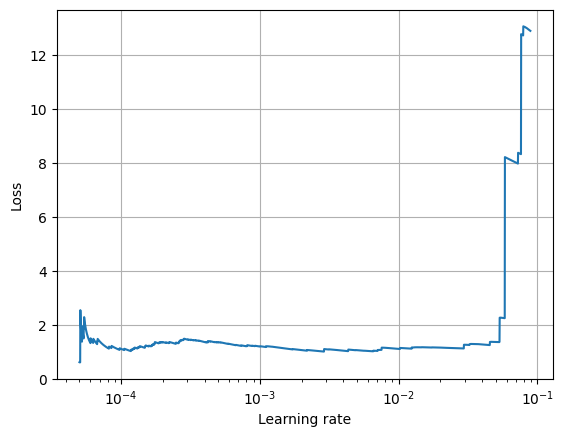

In [169]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
# plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [170]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

fraud_model=Sequential([
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

fraud_model.compile(loss='binary_crossentropy',
                    optimizer=Nadam(learning_rate=1e-3))

In [171]:
es=EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


fraud_hist=fraud_model.fit(X_train, y_train,
                               epochs=50,
                               validation_data=(X_test, y_test),
                            callbacks=[es])

Epoch 1/50
2500/2500 [==============================] - 12s 4ms/step - loss: 0.0142 - val_loss: 0.0077
Epoch 2/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0076 - val_loss: 0.0073
Epoch 3/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0073 - val_loss: 0.0077
Epoch 4/50
2500/2500 [==============================] - 9s 4ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 5/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0066 - val_loss: 0.0080
Epoch 6/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0063 - val_loss: 0.0078
Epoch 7/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0062 - val_loss: 0.0082
Epoch 8/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0060 - val_loss: 0.0085
Epoch 9/50
2500/2500 [==============================] - 10s 4ms/step - loss: 0.0059 - val_loss: 0.0090
Epoch 10/50
2500/2500 [==============================] - 10s 4ms/step - lo

In [180]:
y_preds=fraud_model.predict(X_test)

625/625 [==============================] - 2s 3ms/step


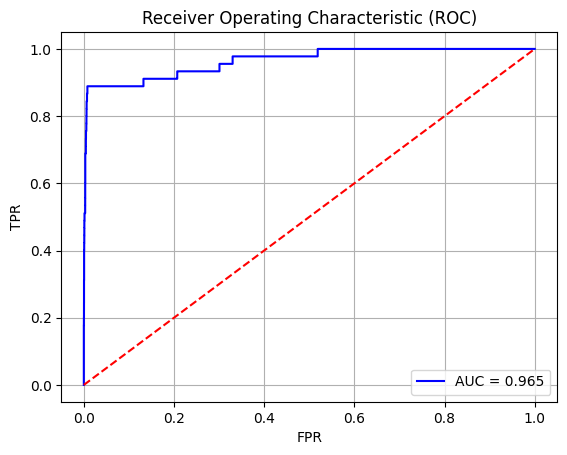

In [182]:
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.grid()
plt.show()

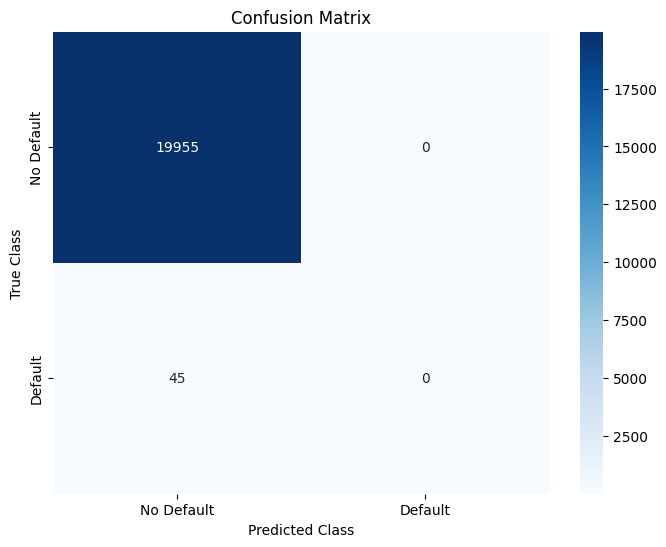

In [184]:
import seaborn as sns

cm = confusion_matrix(y_test, tf.argmax(y_preds, axis=1))
labels = ['No Default', 'Default']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()